In [3]:
import sys
sys.path.append("code")

# %load_ext autoreload

In [4]:
from datetime import datetime

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb
import swifter

In [29]:
from plotting import format_plot, save_plot
from constants import JULIAN_DAY
from spice_tools import as_et, as_utc
from simulation_tools import load_simulation_results
from util import cart2track, cart2spher

In [26]:
def load_and_tf(folder):
    def tf(row):
        acc = row[["acc_rp_earth_x", "acc_rp_earth_y", "acc_rp_earth_z"]].to_numpy()
        pos = row[["pos_x", "pos_y", "pos_z"]].to_numpy()
        vel = row[["vel_x", "vel_y", "vel_z"]].to_numpy()

        row["acc_rp_earth_radial"], row["acc_rp_earth_along"], row["acc_rp_earth_cross"] = cart2track(acc, vel, pos)

        pos_spher = cart2spher(*pos)
        row["lat"] = np.degrees(np.pi / 2 - pos_spher[1])
        row["lon"] = np.degrees(pos_spher[2])

        return row

    df = load_simulation_results(folder)
    return df.iloc[:, :].apply(tf, axis=1)

In [61]:
def plot_accelerations(dfs, labels, skip=[], scale_y=1):
    fig, axs = plt.subplots(4, 1, figsize=(12, 10*scale_y), sharex="all")
    ax_mag, ax_radial, ax_along, ax_cross = axs

    for df, label in zip(dfs, labels):
        if label in skip:
            continue
        ax_mag.plot(df.index, df["acc_rp_earth"], label=label)
        ax_radial.plot(df.index, df["acc_rp_earth_radial"])
        ax_along.plot(df.index, df["acc_rp_earth_along"])
        ax_cross.plot(df.index, df["acc_rp_earth_cross"])

    ax_mag.set_title("magnitude")
    ax_radial.set_title("radial")
    ax_along.set_title("along")
    ax_cross.set_title("cross")
    ax_mag.legend()

    for ax in axs.flat:
        ax.tick_params(axis='x', labelrotation=45)
        ax.set_ylim([min(0, ax.get_ylim()[0]), ax.get_ylim()[1]])
    
    format_plot()

def plot_magnitude(dfs, labels, skip=[]):
    fig, ax = plt.subplots(1, 1, figsize=(12, 8), sharex="all")

    for df, label in zip(dfs, labels):
        if label in skip:
            continue
        ax.plot(df.index, df["acc_rp_earth"], label=label)

    ax.set_title("magnitude")
    ax.legend()

    ax.tick_params(axis='x', labelrotation=45)
    # ax.set_ylim([min(0, ax.get_ylim()[0]), ax.get_ylim()[1]])
    
    format_plot()

# Static vs dynamic paneling

## Constant distribution

In [45]:
# dynamic {12} with constant albedo
df_const_dynamic_single = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/const_dynamic_single")

In [46]:
# dynamic {6, 12} with constant albedo
df_const_dynamic_double = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/const_dynamic_double")

In [47]:
# dynamic {24, 36, 48} with constant albedo
df_const_dynamic_hires = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/const_dynamic_hires")

In [48]:
# dynamic {36, 36, 48, 48} with constant albedo
df_const_dynamic_superres = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/const_dynamic_superres")

In [55]:
# static 100 with constant albedo
df_const_static_100 = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/const_static_100")

In [56]:
# static 200 with constant albedo
df_const_static_200 = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/const_static_200")

In [57]:
# static 2000 with constant albedo
df_const_static_2000 = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/const_static_2000")

In [58]:
# static 10000 with constant albedo
df_const_static_10000 = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/const_static_10000")

In [59]:
# static 20000 with constant albedo
df_const_static_20000 = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/const_static_20000")

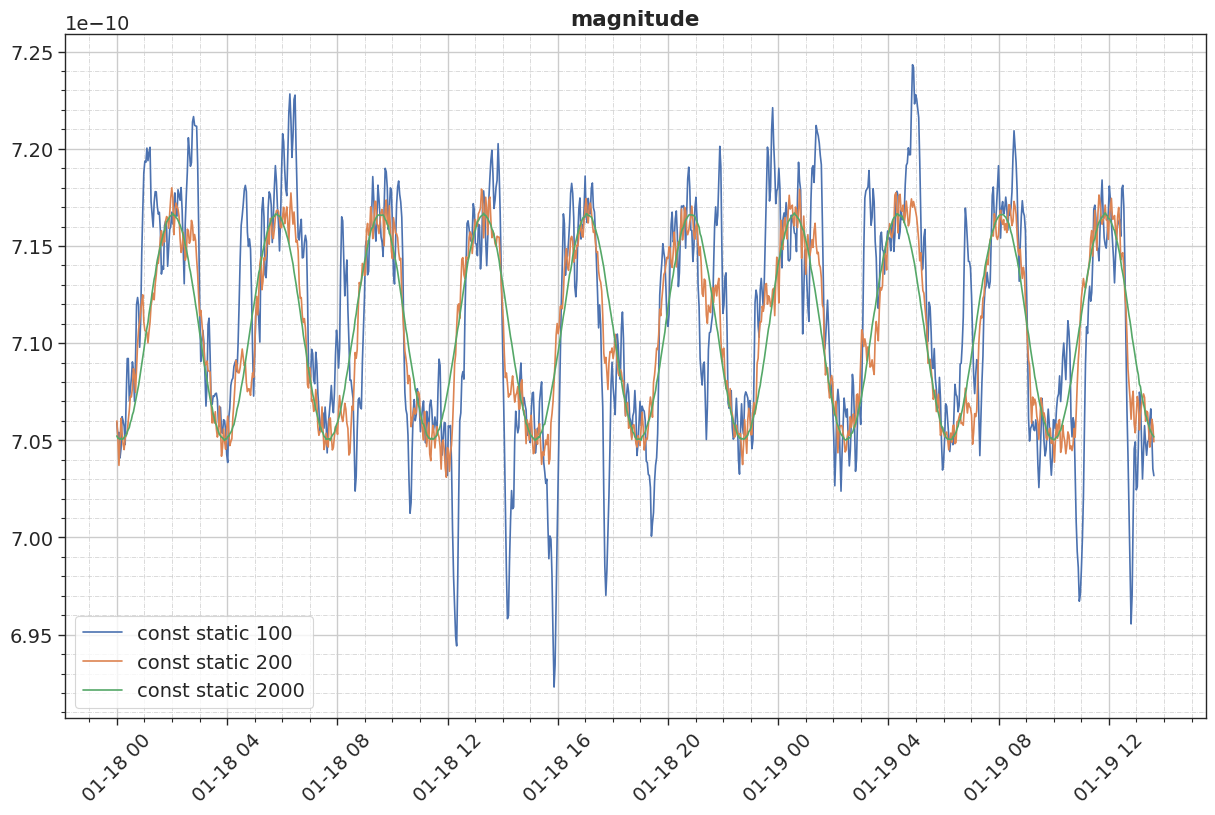

In [62]:
plot_magnitude(
    [df_const_static_100, df_const_static_200, df_const_static_2000],
    ["const static 100", "const static 200", "const static 2000"]
)

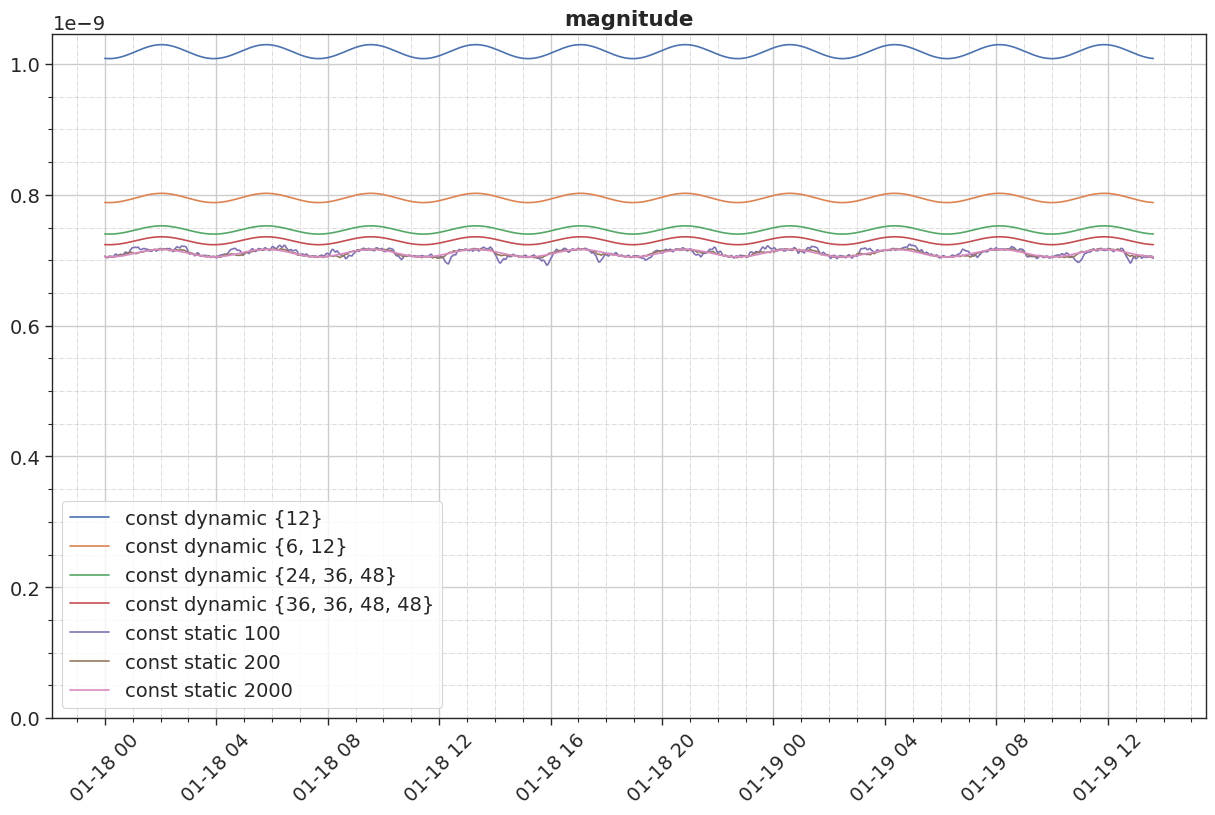

In [54]:
plot_magnitude(
    [df_const_dynamic_single, df_const_dynamic_double, df_const_dynamic_hires, df_const_dynamic_superres, df_const_static_100, df_const_static_200, df_const_static_2000],
    ["const dynamic {12}", "const dynamic {6, 12}", "const dynamic {24, 36, 48}", "const dynamic {36, 36, 48, 48}", "const static 100", "const static 200", "const static 2000"]
)

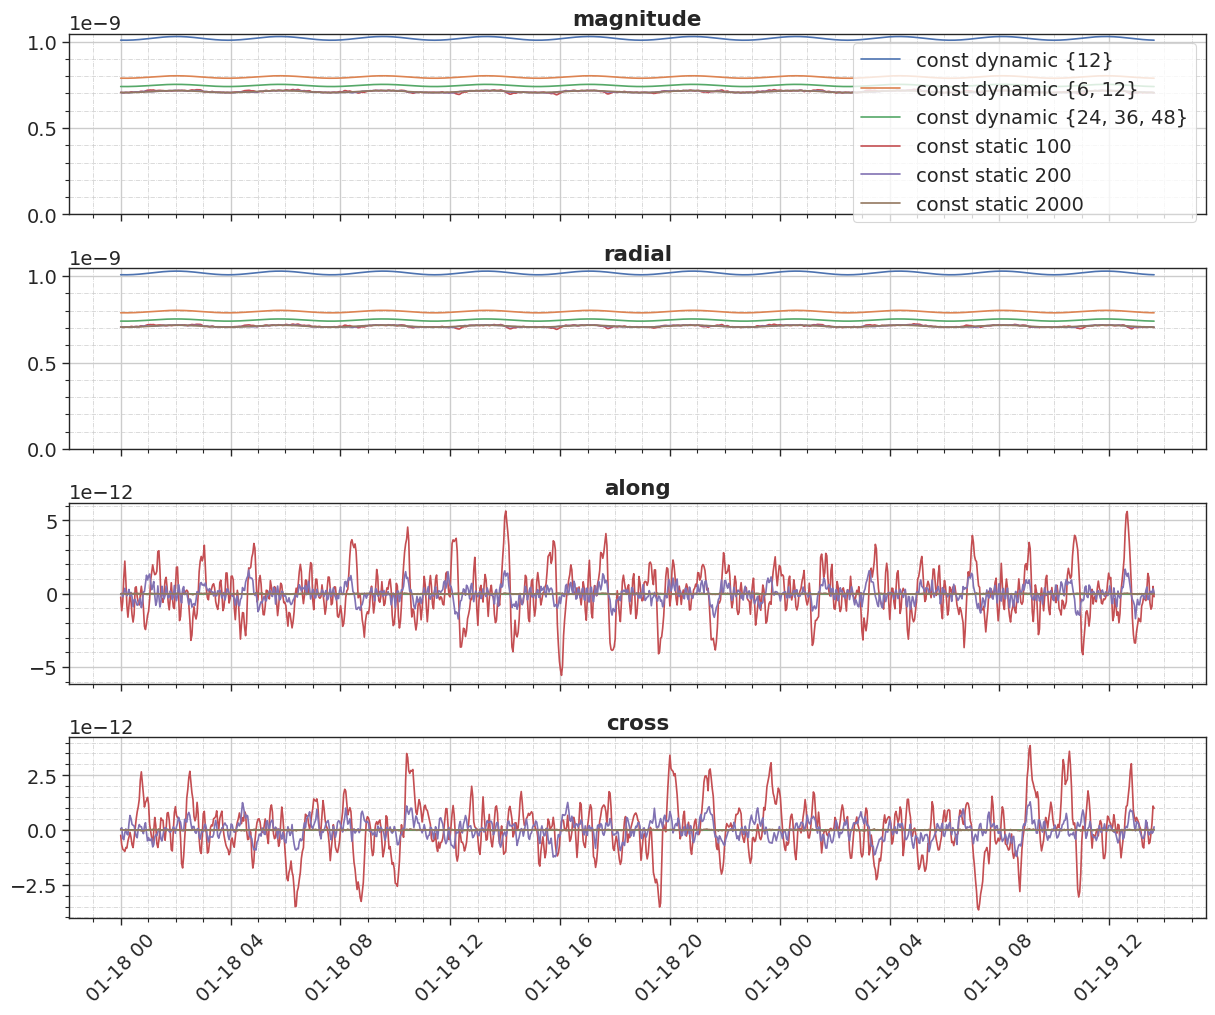

In [55]:
plot_accelerations(
    [df_const_dynamic_single, df_const_dynamic_double, df_const_dynamic_hires, df_const_static_100, df_const_static_200, df_const_static_2000],
    ["const dynamic {12}", "const dynamic {6, 12}", "const dynamic {24, 36, 48}", "const static 100", "const static 200", "const static 2000"]
)

* Dynamic paneling approaches static paneling with more panels

## SH distribution

In [56]:
# static 2000 with SH albedo
df_sh_static_2000 = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/sh_static_2000")

In [57]:
# dynamic {24, 36, 48} with SH albedo
df_sh_dynamic_hires = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/sh_dynamic_hires")

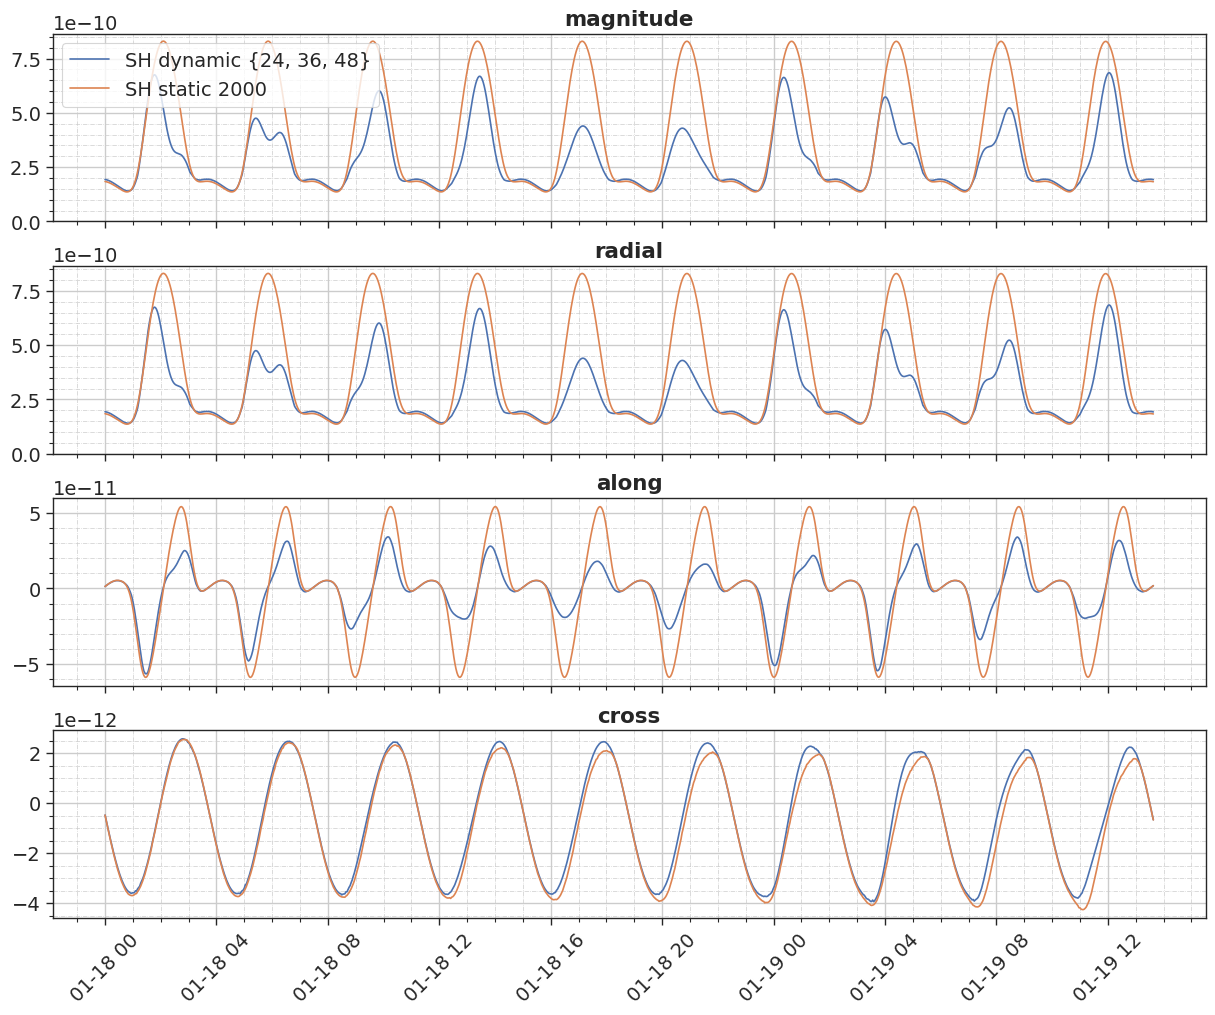

In [58]:
plot_accelerations(
    [df_sh_dynamic_hires, df_sh_static_2000],
    ["SH dynamic {24, 36, 48}", "SH static 2000"]
)

* Static paneling seems to be more stable, but this may just be this particular albedo distribution and orbit

# SH distribution (low orbit)

LAGEOS orbit around Earth but at altitude such that altitude/radius ratio matches LRO

In [59]:
# static 2000 with SH albedo in low orbit
df_sh_static_2000_low = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/sh_static_2000_low")

In [60]:
# dynamic {24, 36, 48} with SH albedo in low orbit
df_sh_dynamic_hires_low = load_and_tf("../../tudat-bundle/results/static_vs_dynamic/sh_dynamic_hires_low")

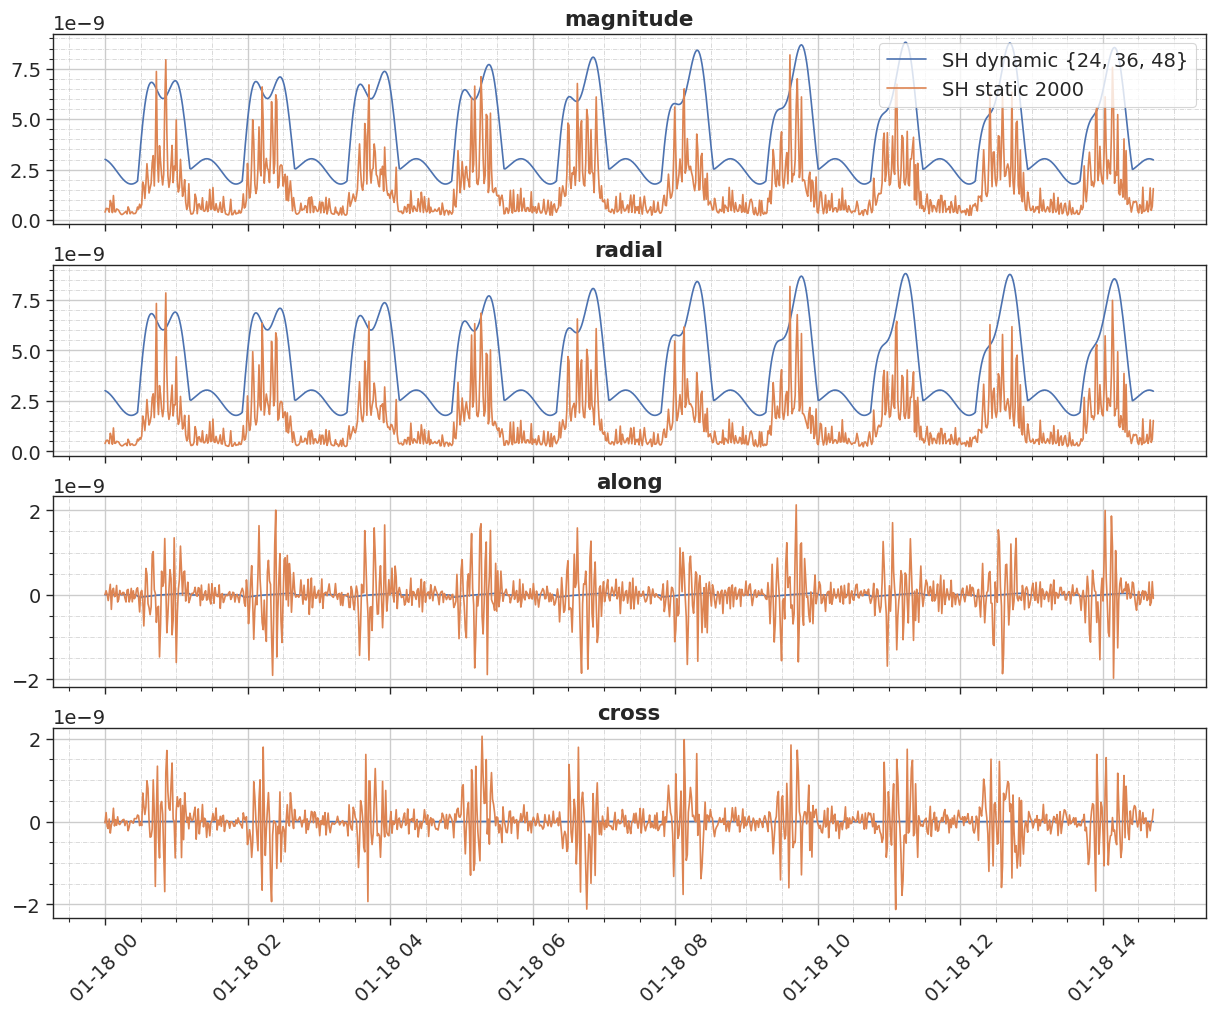

In [61]:
plot_accelerations(
    [df_sh_dynamic_hires_low, df_sh_static_2000_low],
    ["SH dynamic {24, 36, 48}", "SH static 2000"]
)

* Static paneling needs high number for low orbits

# tudat vs Orekit

In [81]:
# {6, 12} with SH albedo
df_knocke_tudat = load_and_tf("../../tudat-bundle/results/vv/knocke_tudat")

In [63]:
# {12} with SH albedo
df_knocke_tudat_single_ring = load_and_tf("../../tudat-bundle/results/vv/knocke_tudat_single_ring")

In [64]:
# {24} with SH albedo
df_knocke_tudat_single_ring_24 = load_and_tf("../../tudat-bundle/results/vv/knocke_tudat_single_24")

In [79]:
# {24, 24, 24} with SH albedo
df_knocke_tudat_triple_24 = load_and_tf("../../tudat-bundle/results/vv/knocke_tudat_triple_24")

In [66]:
# {24, 36, 48} with SH albedo
df_knocke_tudat_hires = load_and_tf("../../tudat-bundle/results/vv/knocke_tudat_hires")

In [67]:
# {24, 36, 48} with SH albedo but no thermal
df_knocke_tudat_hires_albedo_only = load_and_tf("../../tudat-bundle/results/vv/knocke_tudat_hires_albedo_only")

In [68]:
# {24, 36, 48} with SH thermal but no albedo
df_knocke_tudat_hires_thermal_only = load_and_tf("../../tudat-bundle/results/vv/knocke_tudat_hires_thermal_only")

In [69]:
# {24, 24, 24} with SH albedo and summed flux, should be quasi-identical with orekit 15 deg
df_knocke_tudat_triple_24_summed = load_and_tf("../../tudat-bundle/results/vv/knocke_tudat_triple_24_summed")

In [70]:
# 10000 static with SH albedo
df_knocke_tudat_static = load_and_tf("../results/vv/knocke_tudat_static_10000")

In [71]:
def load_orekit(path):
    with open(f"{path}/data.txt") as f:
        rows = []
        for line in f.readlines():
            elems = line.split()
            date = elems[0]
            acc_radial = float(elems[1])
            acc_along = float(elems[2])
            acc_cross = float(elems[3])
            acc_mag = np.linalg.norm([acc_radial, acc_along, acc_cross])
            rows.append([date, acc_mag, acc_radial, acc_along, acc_cross])

    df = pd.DataFrame(rows, columns=["t", "acc_rp_earth", "acc_rp_earth_radial", "acc_rp_earth_along", "acc_rp_earth_cross"])
    df.index = pd.to_datetime(df["t"])

    return df

In [72]:
# 15 deg res with sin
df_knocke_orekit_15 = load_orekit("../results/vv/knocke_orekit_15")

In [73]:
# 15 deg res with cos
df_knocke_orekit_15_cos = load_orekit("../results/vv/knocke_orekit_15_cos")

In [74]:
(df_knocke_tudat_triple_24["acc_rp_earth"] - df_knocke_tudat_triple_24_summed["acc_rp_earth"]).max()

9.822769774067204e-25

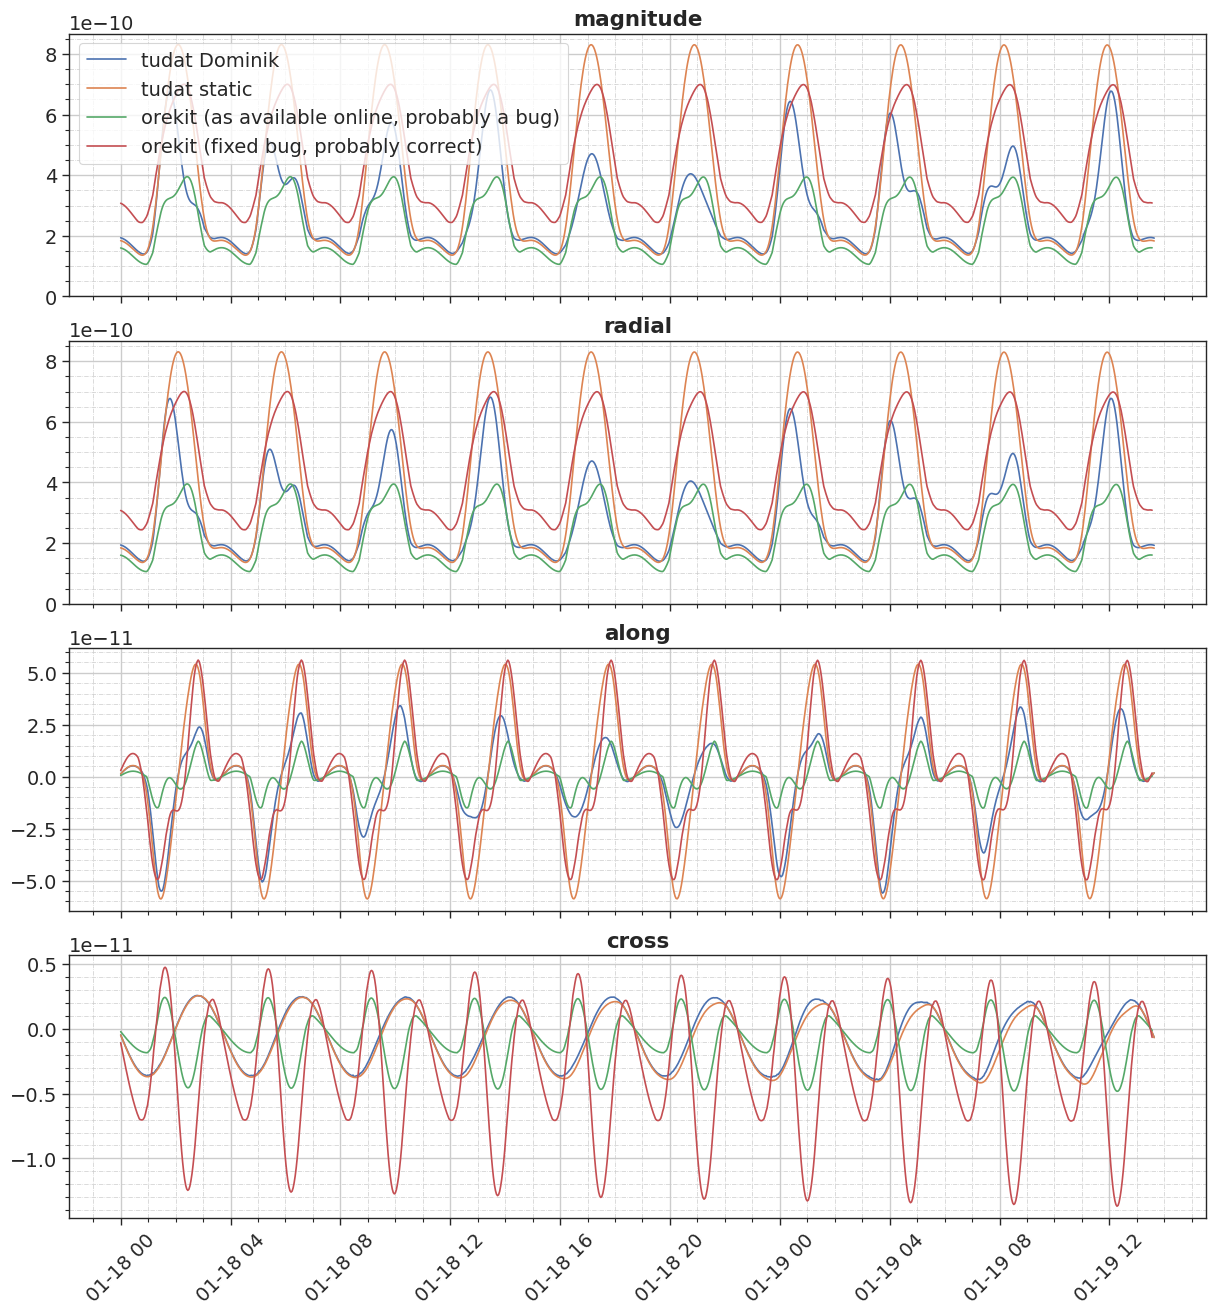

In [83]:
plot_accelerations(
    [df_knocke_tudat_triple_24_summed, df_knocke_tudat_static, df_knocke_orekit_15, df_knocke_orekit_15_cos],
    ["tudat Dominik", "tudat static", "orekit (as available online, probably a bug)", "orekit (fixed bug, probably correct)"], scale_y=1.3)

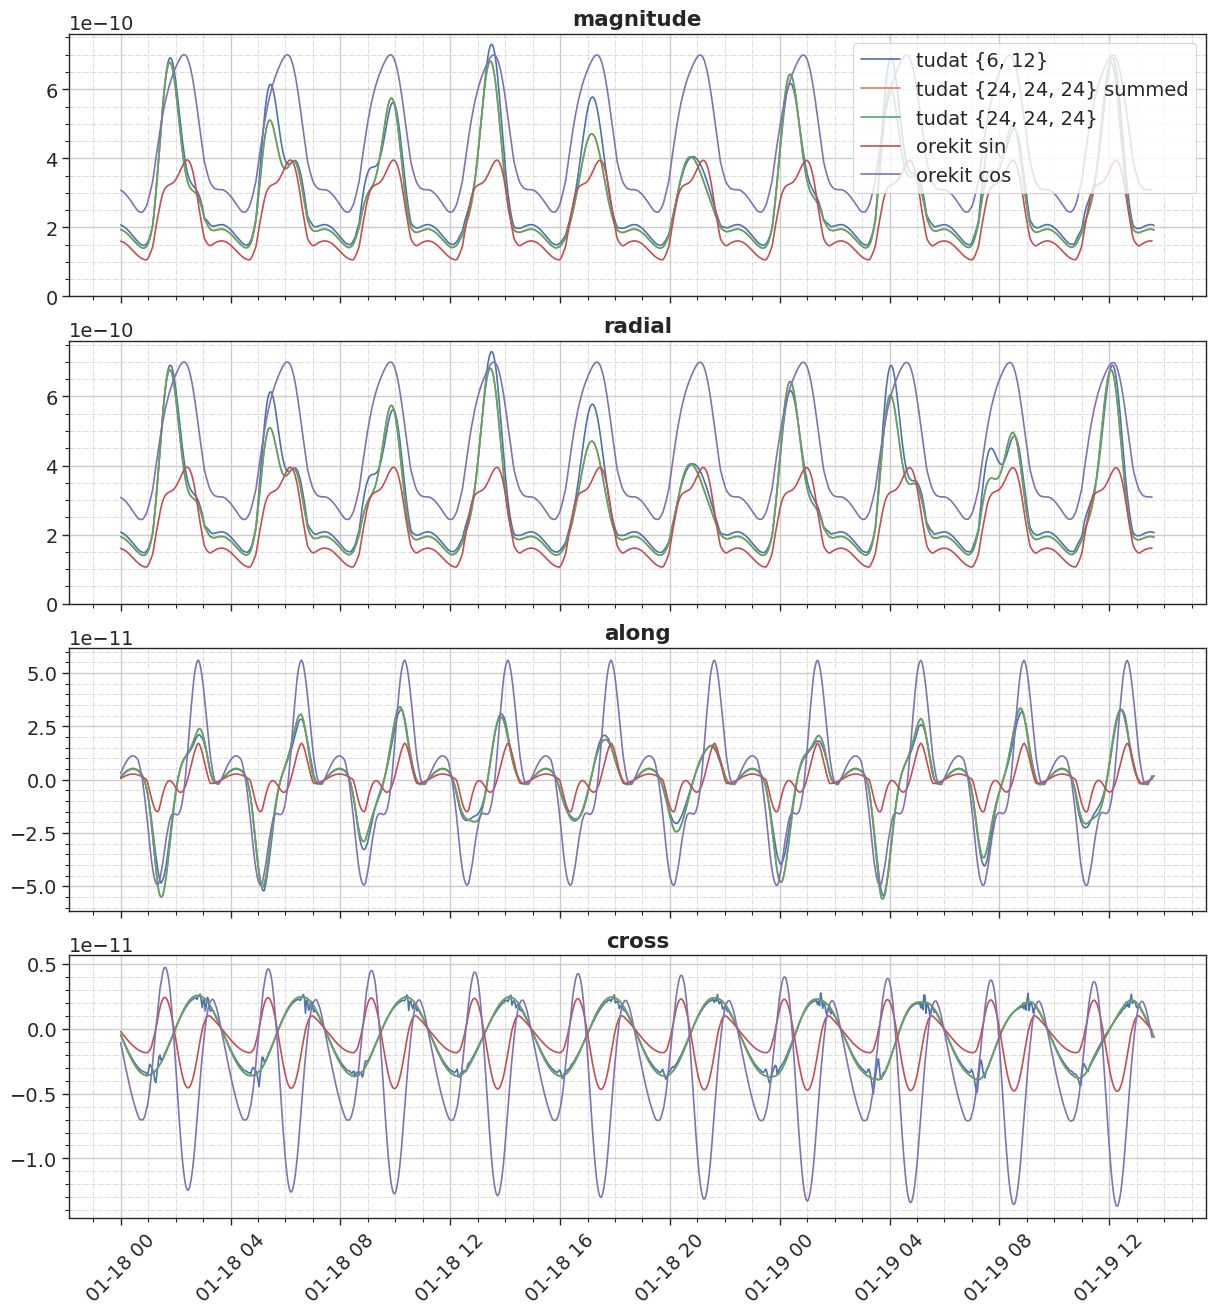

In [82]:
plot_accelerations(
    [df_knocke_tudat, df_knocke_tudat_triple_24_summed, df_knocke_tudat_single_ring, df_knocke_tudat_single_ring_24, df_knocke_tudat_triple_24, df_knocke_tudat_hires, df_knocke_orekit_15, df_knocke_orekit_15_cos],
    ["tudat {6, 12}", "tudat {24, 24, 24} summed", "tudat {12}", "tudat {24}", "tudat {24, 24, 24}", "tudat {24, 36, 48}", "orekit sin", "orekit cos"], skip=["tudat {12}", "tudat {24}", "tudat {24, 36, 48}"], scale_y=1.3)

Orekit uses an angular resolution of 15 deg -> {24} panels with sin bug, {24, 24, 24} with proper cos

* Summing the flux (single incident flux onto s/c instead of one from each panel) does not make any difference -> could reduce computations, but odd that is does not have any effect
* When the cos/sin bug is fixed (https://gitlab.orekit.org/orekit/orekit/-/issues/852) such that the entire spherical cap is filled with panels properly (with sin, the used cap is smaller than the actual visible cap), the magnitude doubles
* Neither of the cos/sin versions agrees well with the tudat results, but the order of magnitude agrees
* Phasing of the cross acceleration is off

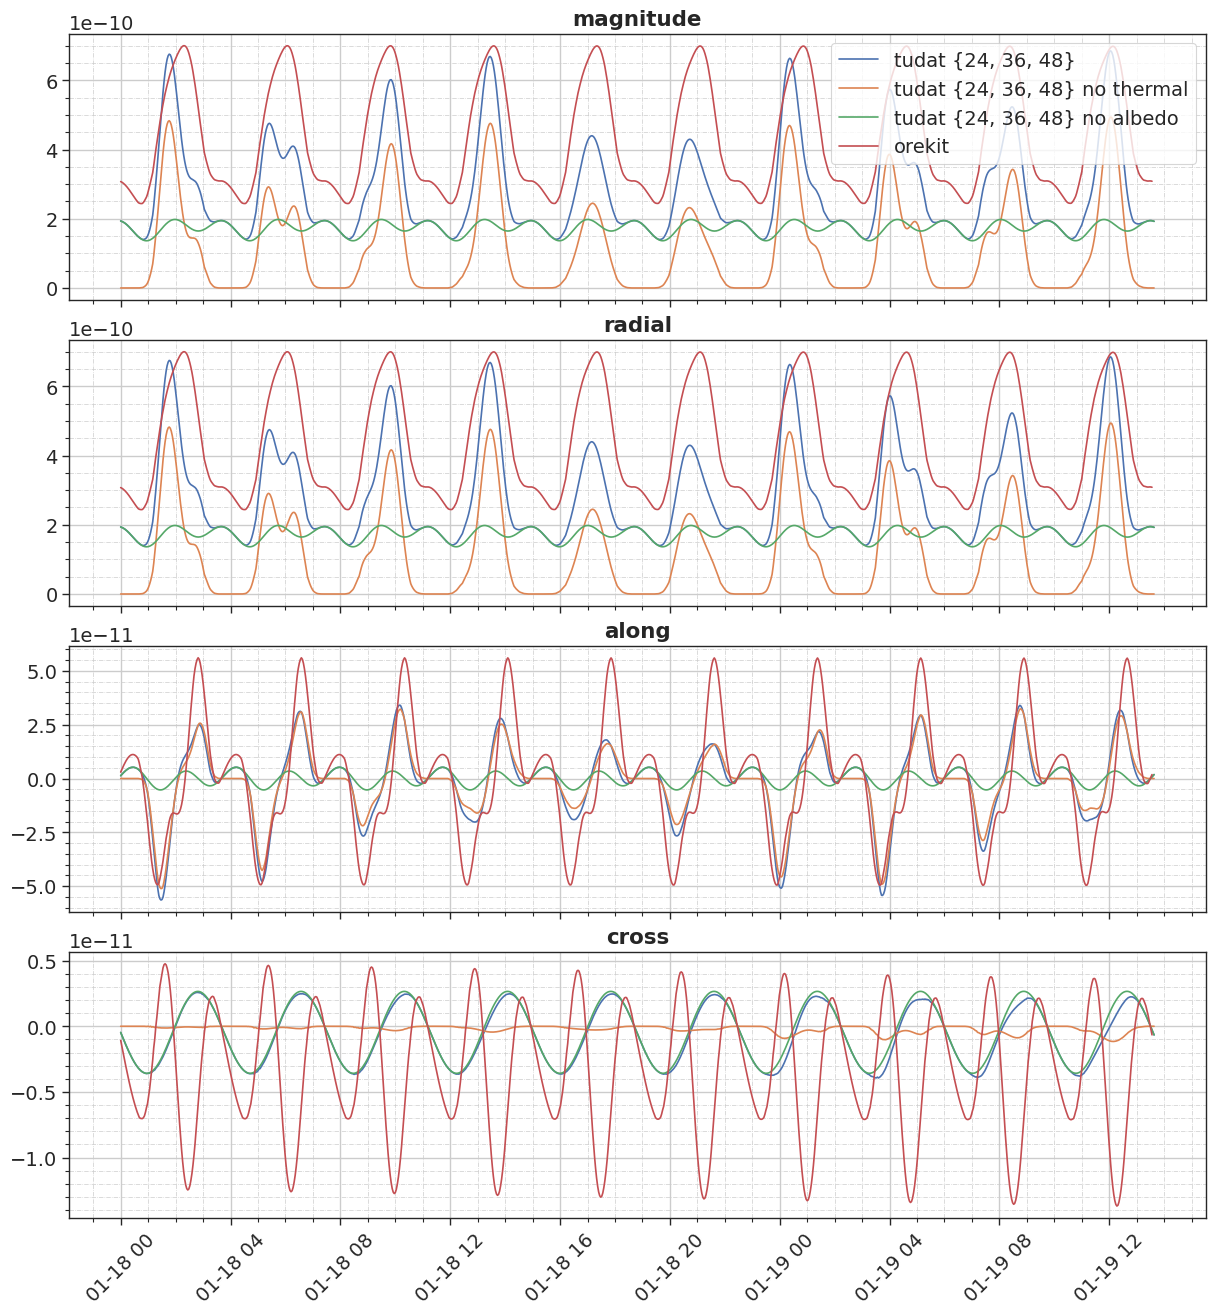

In [78]:
plot_accelerations(
    [df_knocke_tudat_hires, df_knocke_tudat_hires_albedo_only, df_knocke_tudat_hires_thermal_only, df_knocke_orekit_15_cos],
    ["tudat {24, 36, 48}", "tudat {24, 36, 48} no thermal", "tudat {24, 36, 48} no albedo", "orekit"], scale_y=1.3)

Differences between computations in orekit and tudat:
* Orekit uses single summed flux, while we apply fluxes from each panel individually
* Orekit uses an angular resolution instead of a fixed number of panels -> a higher orbit results in more panels, which is not how Knocke did it
* Orekit uses the same angular resolution for zonal and meriodinal flow -> same number of panels per ring

Neither Knocke nor we space panels such that they have equal projected, attenuated area

In [30]:
df_knocke_tudat_test = load_and_tf("../../tudat-bundle/results/vv/knocke_tudat_test")

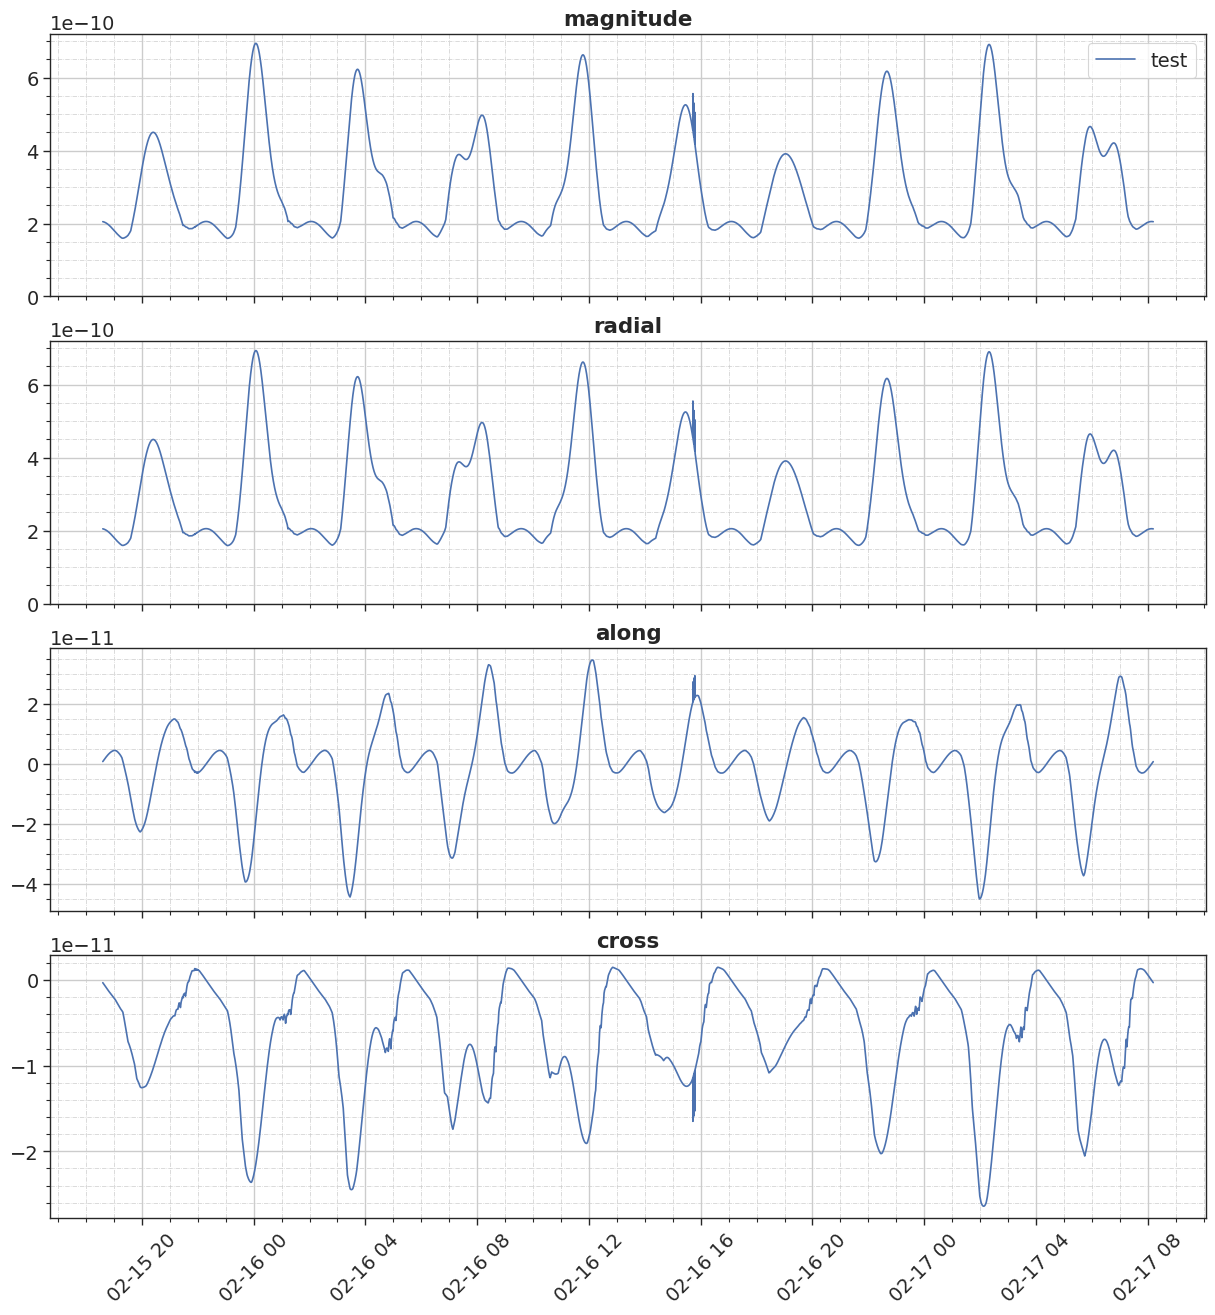

In [31]:
plot_accelerations(
    [df_knocke_tudat_test],
    ["test"], scale_y=1.3)

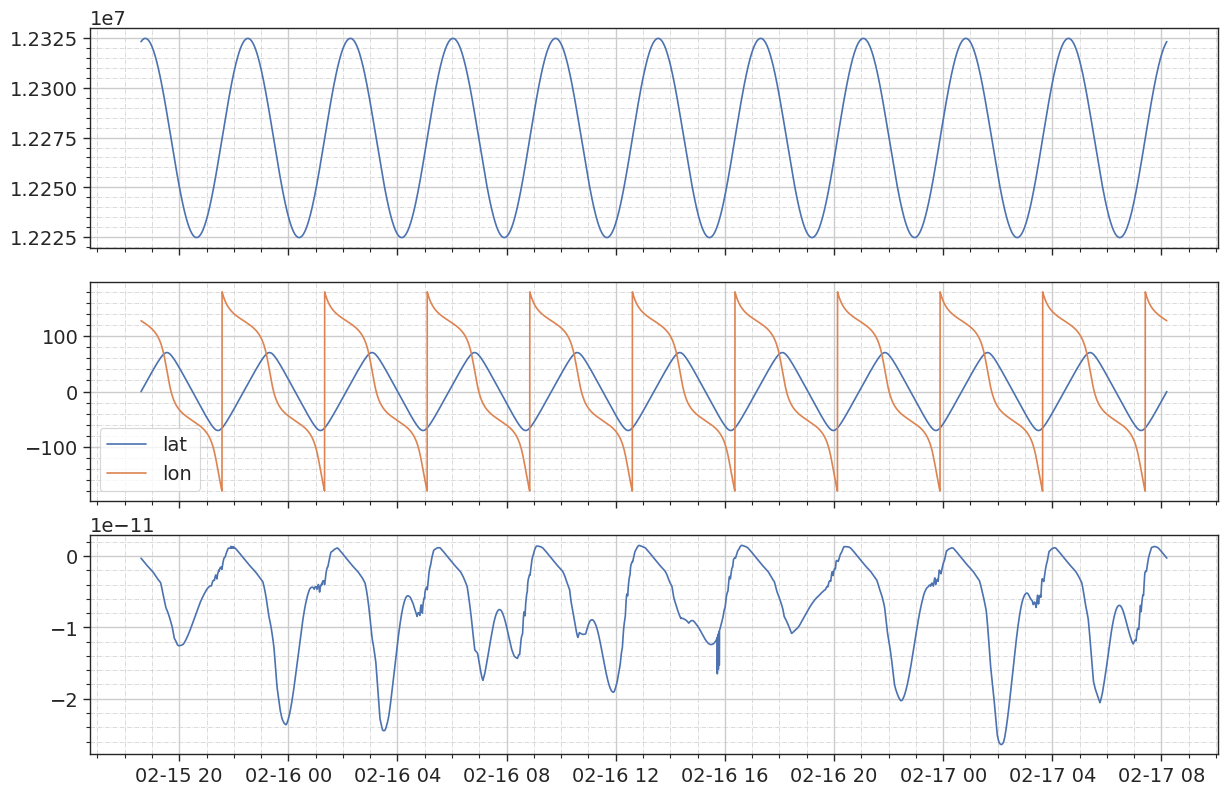

In [44]:
fig, axs = plt.subplots(3, 1, figsize=(12, 6*1.3), sharex="all")
axs[0].plot(df_knocke_tudat_test.index, np.linalg.norm(df_knocke_tudat_test[["pos_x", "pos_y", "pos_z"]].to_numpy(), axis=1), label="altitude")
axs[1].plot(df_knocke_tudat_test.index, df_knocke_tudat_test["lat"], label="lat")
axs[1].plot(df_knocke_tudat_test.index, df_knocke_tudat_test["lon"], label="lon")
axs[2].plot(df_knocke_tudat_test.index, df_knocke_tudat_test["acc_rp_earth_cross"], label="lon")
# plt.plot(df_knocke_tudat_test.index, df_knocke_tudat_test["vel_x"], label="vel_x")
# plt.plot(df_knocke_tudat_test.index, df_knocke_tudat_test["vel_y"], label="vel_y")
# plt.plot(df_knocke_tudat_test.index, df_knocke_tudat_test["vel_z"], label="vel_z")
# plt.plot(df_knocke_tudat_test.index, df_knocke_tudat_test["pos_x"], label="pos_x")
# plt.plot(df_knocke_tudat_test.index, df_knocke_tudat_test["pos_y"], label="pos_y")
# plt.plot(df_knocke_tudat_test.index, df_knocke_tudat_test["pos_z"], label="pos_z")
format_plot()
axs[1].legend()

In [32]:
df_knocke_tudat_test

pos_x         pos_y          pos_z   
t                                                                       
1977-02-15 18:36:05.348293 -7.530900e+06  9.754197e+06   -9683.284198  \
1977-02-15 18:36:18.882453 -7.510311e+06  9.769962e+06   62629.177083   
1977-02-15 18:36:32.416614 -7.489429e+06  9.785345e+06  134939.194903   
1977-02-15 18:36:45.950774 -7.468255e+06  9.800346e+06  207243.948193   
1977-02-15 18:36:59.484934 -7.446790e+06  9.814965e+06  279540.616192   
...                                  ...           ...            ...   
1977-02-17 08:10:52.814184 -7.610309e+06  9.687340e+06 -298902.376175   
1977-02-17 08:11:06.348344 -7.590900e+06  9.704623e+06 -226608.354335   
1977-02-17 08:11:19.882504 -7.571196e+06  9.721527e+06 -154305.490688   
1977-02-17 08:11:33.416665 -7.551195e+06  9.738052e+06  -81996.606467   
1977-02-17 08:11:46.950825 -7.530900e+06  9.754197e+06   -9684.523026   

                                  vel_x        vel_y        vel_z   
t                                                                   
1977-02-15 18:36:05.348293  1510.400134  1178.848987  5342.979645  \
1977-02-15 18:36:18.882453  1532.080105  1150.707422  5342.903331   
1977-02-15 18:36:32.416614  1553.699894  1122.521494  5342.618567   
1977-02-15 18:36:45.950774  1575.258669  1094.292291  5342.125373   
1977-02-15 18:36:59.484934  1596.755602  1066.020903  5341.423774   
...                                 ...          ...          ...   
1977-02-17 08:10:52.814184  1423.094758  1290.950377  5341.200294   
1977-02-17 08:11:06.348344  1445.007102  1262.997116  5341.957811   
1977-02-17 08:11:19.882504  1466.862611  1234.995155  5342.506882   
1977-02-17 08:11:33.416665  1488.660446  1206.945576  5342.847495   
1977-02-17 08:11:46.950825  1510.399767  1178.849462  5342.979645   

                            acc_rp_earth_x  acc_rp_earth_y  acc_rp_earth_z   
t                                                                            
1977-02-15 18:36:05.348293   -1.253793e-10    1.623917e-10    6.805557e-13  \
1977-02-15 18:36:18.882453   -1.249941e-10    1.625988e-10    1.936787e-12   
1977-02-15 18:36:32.416614   -1.246016e-10    1.627960e-10    3.192107e-12   
1977-02-15 18:36:45.950774   -1.242019e-10    1.629832e-10    4.446391e-12   
1977-02-15 18:36:59.484934   -1.237951e-10    1.631605e-10    5.699515e-12   
...                                    ...             ...             ...   
1977-02-17 08:10:52.814184   -1.267577e-10    1.613512e-10   -4.380679e-12   
1977-02-17 08:11:06.348344   -1.264037e-10    1.615995e-10   -3.122972e-12   
1977-02-17 08:11:19.882504   -1.260422e-10    1.618380e-10   -1.865649e-12   
1977-02-17 08:11:33.416665   -1.256733e-10    1.620667e-10   -6.088351e-13   
1977-02-17 08:11:46.950825   -1.252972e-10    1.622855e-10    6.473452e-13   

                                    t_et             r             h   
t                                                                      
1977-02-15 18:36:05.348293 -7.218482e+08  1.232310e+07  1.058710e+07  \
1977-02-15 18:36:18.882453 -7.218482e+08  1.232318e+07  1.058718e+07   
1977-02-15 18:36:32.416614 -7.218482e+08  1.232326e+07  1.058726e+07   
1977-02-15 18:36:45.950774 -7.218481e+08  1.232333e+07  1.058733e+07   
1977-02-15 18:36:59.484934 -7.218481e+08  1.232341e+07  1.058741e+07   
...                                  ...           ...           ...   
1977-02-17 08:10:52.814184 -7.217129e+08  1.232277e+07  1.058677e+07   
1977-02-17 08:11:06.348344 -7.217129e+08  1.232286e+07  1.058686e+07   
1977-02-17 08:11:19.882504 -7.217129e+08  1.232294e+07  1.058694e+07   
1977-02-17 08:11:33.416665 -7.217129e+08  1.232302e+07  1.058702e+07   
1977-02-17 08:11:46.950825 -7.217128e+08  1.232310e+07  1.058710e+07   

                            acc_rp_earth  acc_rp_earth_radial   
t                                                               
1977-02-15 18:36:05.348293  2.051621e-10         2.051604e-10  \
1977-02-15 18:36:18.882453  2.050991e-10

In [46]:
df_knocke_tudat_test_eclip = load_and_tf("../../tudat-bundle/results/vv/knocke_tudat_test_eclip")

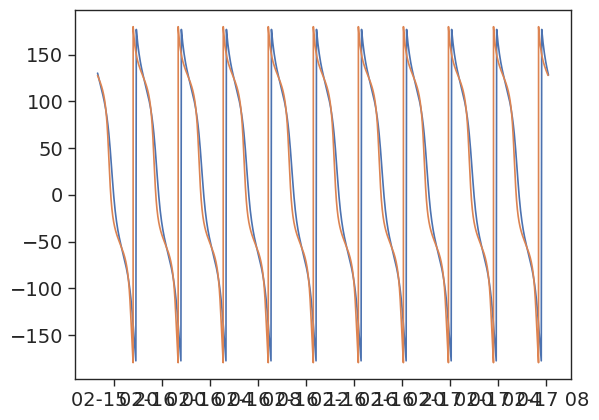

In [52]:
plt.plot(df_knocke_tudat_test_eclip.index, df_knocke_tudat_test_eclip["lon"])
plt.plot(df_knocke_tudat_test.index, df_knocke_tudat_test["lon"])